In [1029]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [1030]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [1031]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

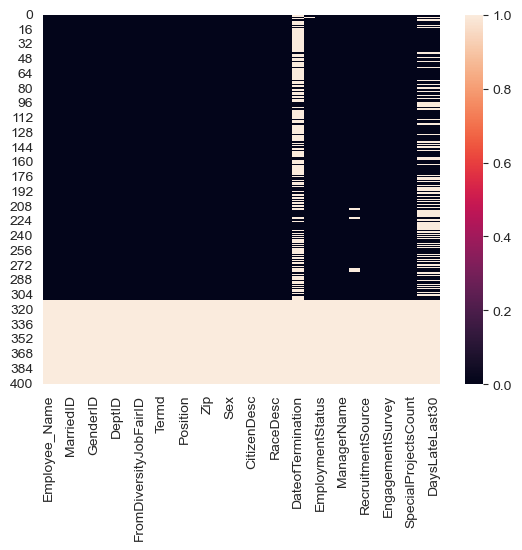

In [1032]:
sns.heatmap(df.isnull())

In [1033]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']]

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
...,...,...,...
305,NaT,2052-01-18,2014-11-10
306,NaT,1986-04-23,2014-11-10
307,NaT,1983-02-09,2016-06-30
308,NaT,2065-09-09,2014-11-10


### Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [1034]:
sns.set_style('darkgrid')

In [1035]:
manager = df[['ManagerName', 'ManagerID', 'PerformanceScore']]
def score(x):
    SCORE = {
        'Exceeds': 5,
        'Fully Meets': 4,
        'Partially Meets': 3,
        'Needs Improvement': 2,
        'PIP': 1
        
    }
    return SCORE[x]
manager['PerformanceScore'] = manager['PerformanceScore'].apply(lambda x: score(x))

C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\2600543488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manager['PerformanceScore'] = manager['PerformanceScore'].apply(lambda x: score(x))


In [1036]:
manager = manager.pivot_table(values=('ManagerID','PerformanceScore'), index='ManagerName', aggfunc='mean')

{'whiskers': [<matplotlib.lines.Line2D at 0x1dcba94b970>,
 'caps': [<matplotlib.lines.Line2D at 0x1dcba94bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dcba94b700>],
 'medians': [<matplotlib.lines.Line2D at 0x1dcba9584f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dcba9587c0>],
 'means': []}

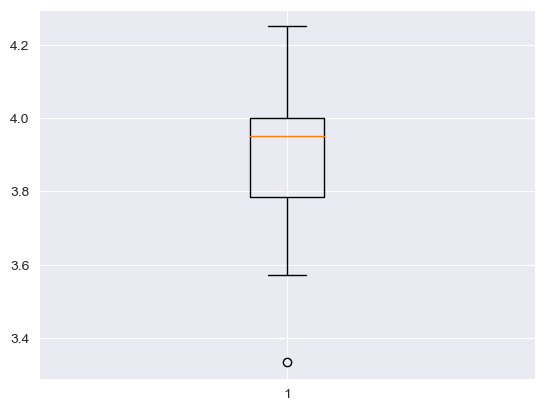

In [1037]:
plt.boxplot(data = manager, x='PerformanceScore')

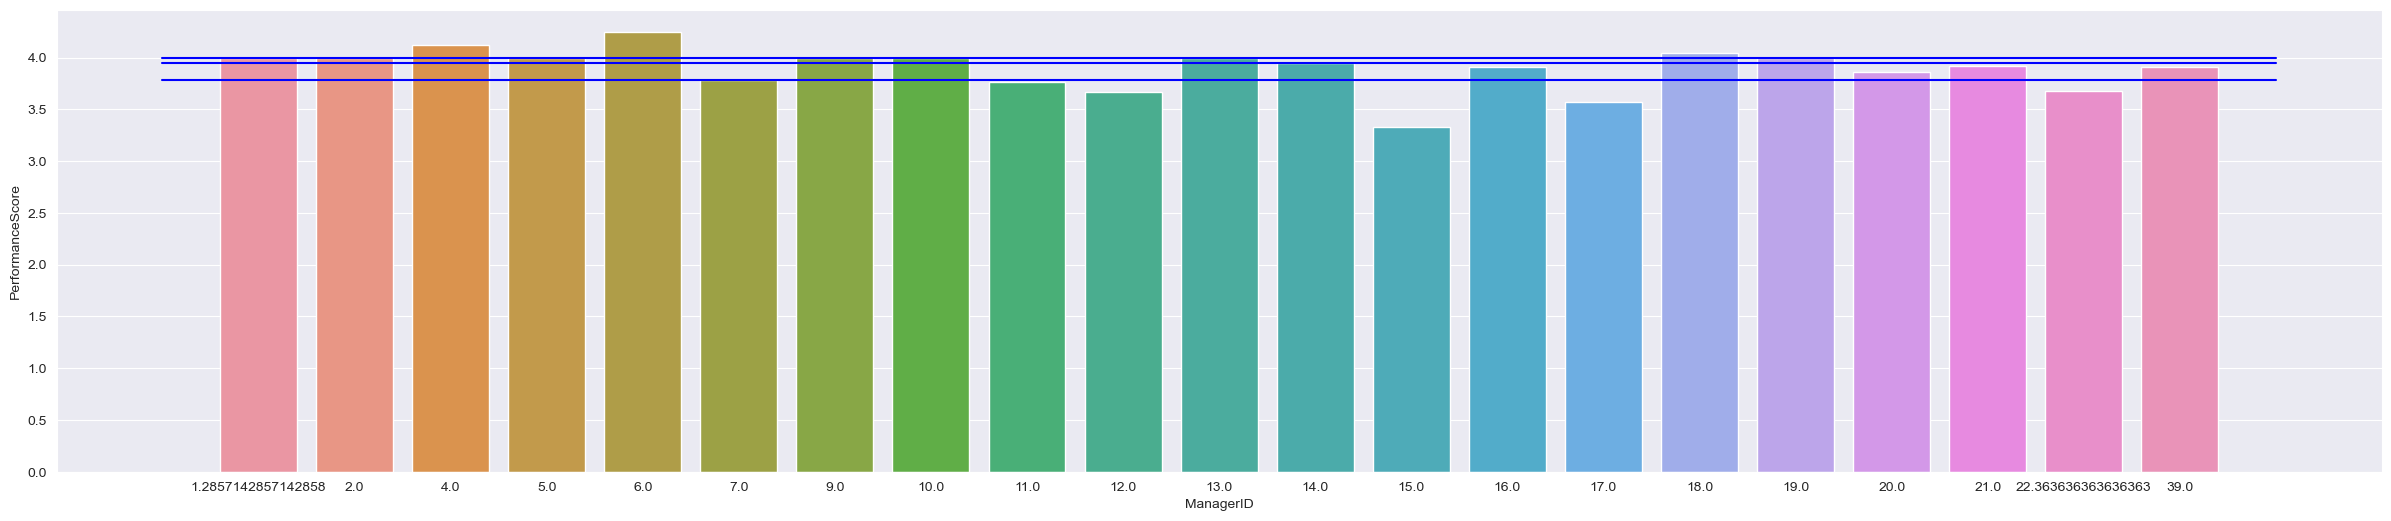

In [1038]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(x='ManagerID',y='PerformanceScore',data=manager)
ax.plot([-1,21], [manager['PerformanceScore'].quantile([0.25,0.5,0.75]),manager['PerformanceScore'].quantile([0.25,0.5,0.75])], color='blue')

In [1039]:
manager[manager['ManagerID'] == 6]

,ManagerID,PerformanceScore
ManagerName,,
Eric Dougall,6.0,4.25


In [1040]:
manager[manager['ManagerID'] == 15]

,ManagerID,PerformanceScore
ManagerName,,
Debra Houlihan,15.0,3.333333


In [1041]:
manager_number_of_performance = df.groupby('ManagerName').agg({'Employee_Name': 'count', 'ManagerID': 'mean'})
manager_number_of_performance = manager_number_of_performance.join(manager.set_index('ManagerID'), on='ManagerID')
manager_number_of_performance

,Employee_Name,ManagerID,PerformanceScore
ManagerName,,,
Alex Sweetwater,9,10.000000,4.000000
Amy Dunn,21,11.000000,3.761905
Board of Directors,2,9.000000,4.000000
Brandon R. LeBlanc,7,1.285714,4.000000
Brannon Miller,21,12.000000,3.666667
Brian Champaigne,8,13.000000,4.000000
David Stanley,21,14.000000,3.952381
Debra Houlihan,3,15.000000,3.333333
Elijiah Gray,22,16.000000,3.909091


In [1042]:
manager_number_of_performance['Employee_Name'].mean()

14.761904761904763

{'whiskers': [<matplotlib.lines.Line2D at 0x1dcbabcf400>,
 'caps': [<matplotlib.lines.Line2D at 0x1dcbabcf9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dcbabcf100>],
 'medians': [<matplotlib.lines.Line2D at 0x1dcbabcff40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dcbabdc250>],
 'means': []}

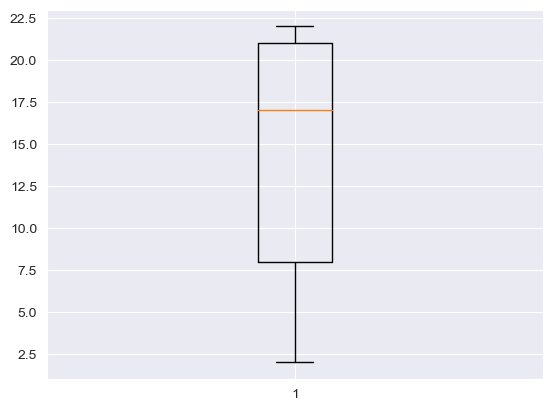

In [1043]:
manager_mean = manager_number_of_performance['Employee_Name']
plt.boxplot(manager_mean)

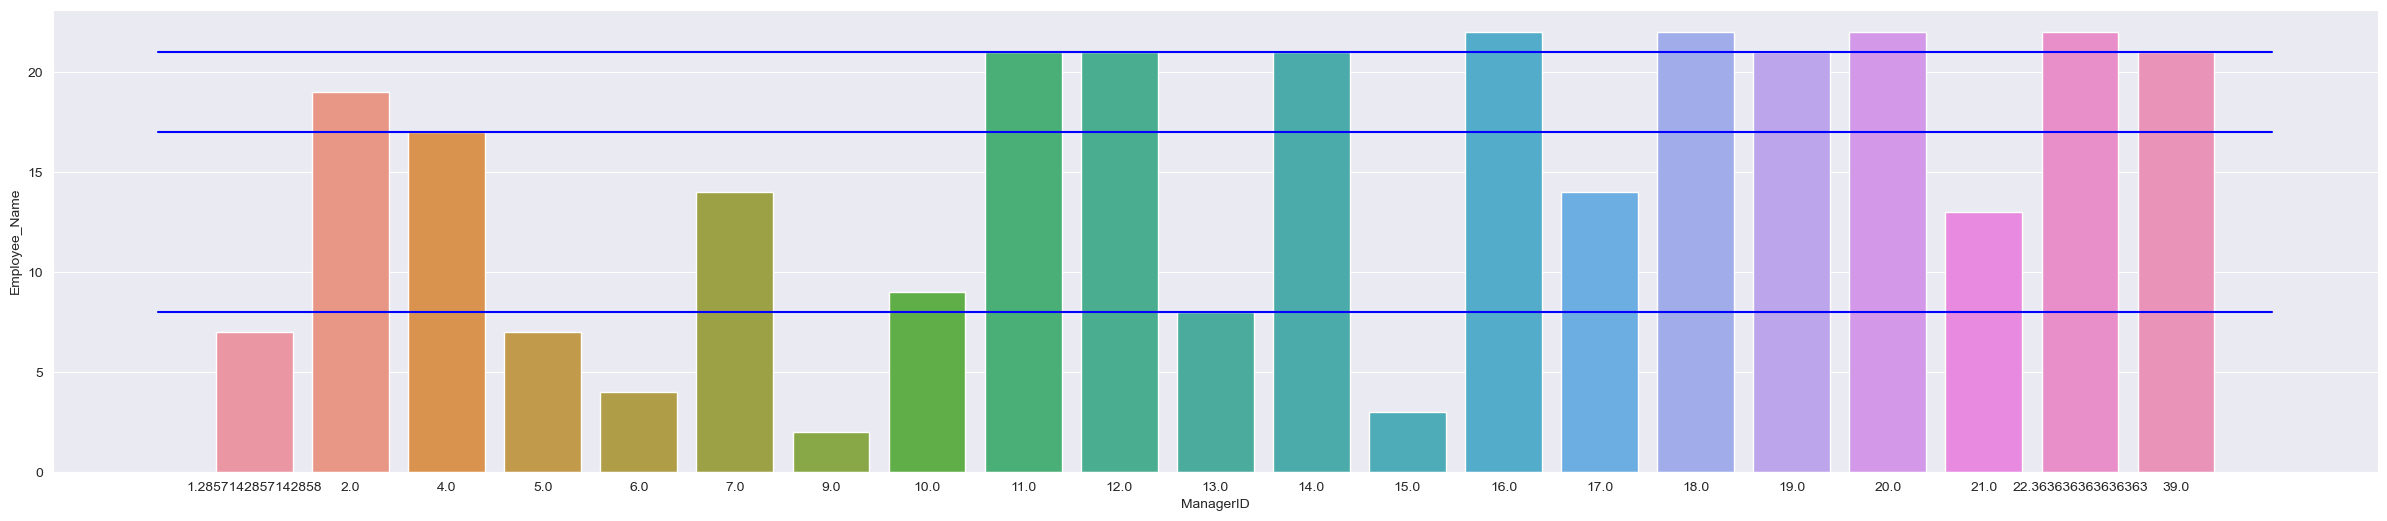

In [1044]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(x='ManagerID',y='Employee_Name',data=manager_number_of_performance)
ax.plot([-1,21], [manager_number_of_performance['Employee_Name'].quantile([0.25,0.5,0.75]),manager_number_of_performance['Employee_Name'].quantile([0.25,0.5,0.75])], color='blue')

<b><font color='green'>ODP: Zebrane dane wskazują, że przełożony Eric Dougall wystawiał najwyższe oceny, a przełożony Debra Houlihan najniższe. Jednak przedstawione dane mogą być niereprezentatywne z uwagi na ilość wykonanych ocen pracowników przez te osoby. Średnio przełożeni dokonywali ocen dla 14.76 pracownika, a mediana wynosi około 17. Natomiast menadżerowie o numerach ID: 12, 17 i 22 wykonali co najmniej między 1 a 3 kwartylem ilości ocen pracowników. W związku z tym możemy uznać, że menadżer 12, 17 i 22 dawali najniższe oceny swoim pracownikom. </b></font>

### Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [1045]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [1046]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df['Employees'] = 1

In [1047]:
df_rs = df[['RecruitmentSource','Seniority', 'Employees']]
df_rs = df_rs.pivot_table(values=('Seniority', 'Employees'), index='RecruitmentSource', aggfunc={'Seniority' : 'mean', 'Employees' : 'sum'})
df_rs['Recruitment_Source'] = df_rs.index
df_rs.head()

,Employees,Seniority,Recruitment_Source
RecruitmentSource,,,
Billboard,16,5.862886,Billboard
Careerbuilder,1,8.482036,Careerbuilder
Company Intranet - Partner,1,1.215631,Company Intranet - Partner
Diversity Job Fair,29,4.492339,Diversity Job Fair
Employee Referral,31,5.026002,Employee Referral


<AxesSubplot:xlabel='Seniority', ylabel='Recruitment_Source'>

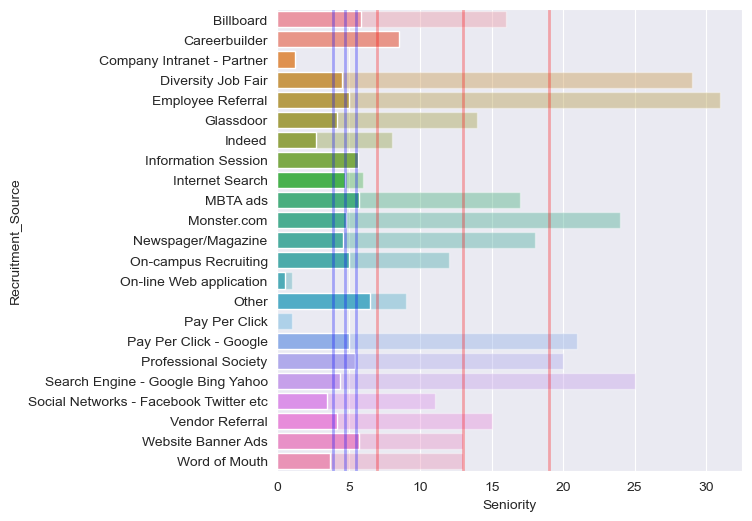

In [1048]:
fig = plt.subplots(figsize=(6, 6))
plt.vlines(x = df_rs['Seniority'].quantile([0.25,0.5,0.75]), ymin = -1, ymax = 24, color = 'blue',alpha=0.3, linewidth=2)
plt.vlines(x = df_rs['Employees'].quantile([0.25,0.5,0.75]), ymin = -1, ymax = 24, color = 'red',alpha=0.3, linewidth=2)
sns.barplot(data=df_rs, x='Employees',y='Recruitment_Source', alpha = 0.4)
sns.barplot(data=df_rs, x='Seniority',y='Recruitment_Source')

In [1049]:
df_rs[df_rs['Recruitment_Source'] == 'Careerbuilder']

,Employees,Seniority,Recruitment_Source
RecruitmentSource,,,
Careerbuilder,1,8.482036,Careerbuilder


<b><font color='green'>ODP: Najlepszym źródłem pozyskania pracownika ze względu na najwyższy staż jest 'Careerbuilder'. Jednak jest to pojedynczy przypadek i w związku z tym może być to jednostkowa sytuacja. Według danych najlepsze rezultaty w historii zatrudnień w firmie osiągnięto przez metody: 'Billboard' i 'Other'.</font></b>

### Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

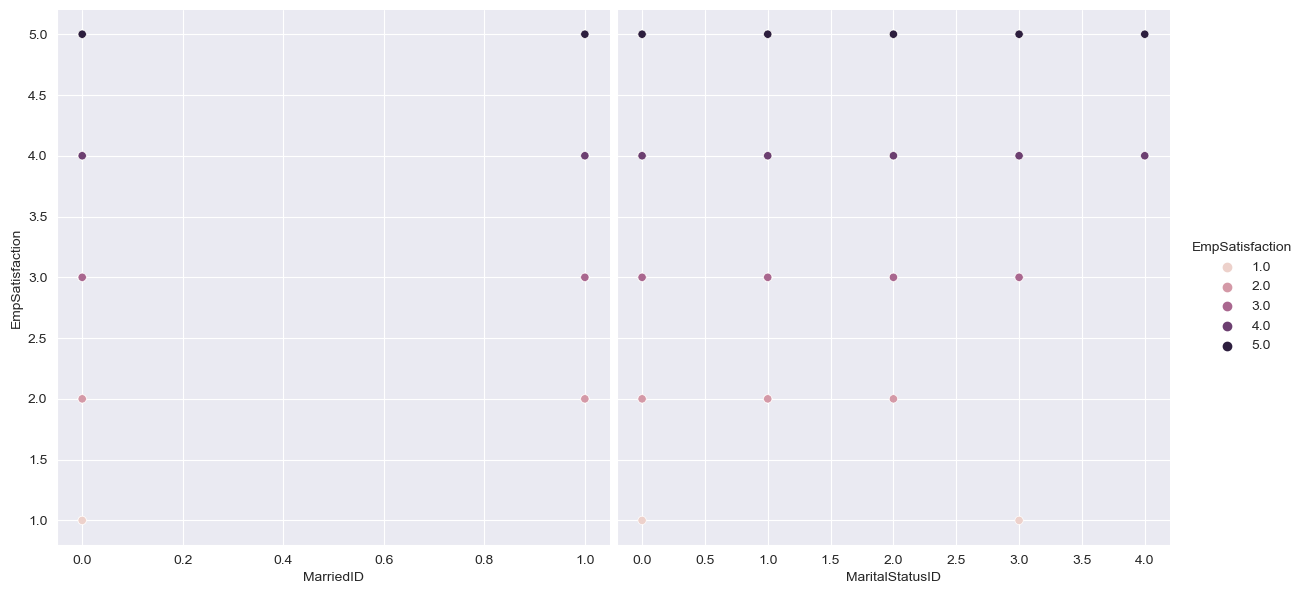

In [1050]:
sns.pairplot(df, hue='EmpSatisfaction', x_vars=['MarriedID','MaritalStatusID'], y_vars=['EmpSatisfaction'], height=6)

<AxesSubplot:>

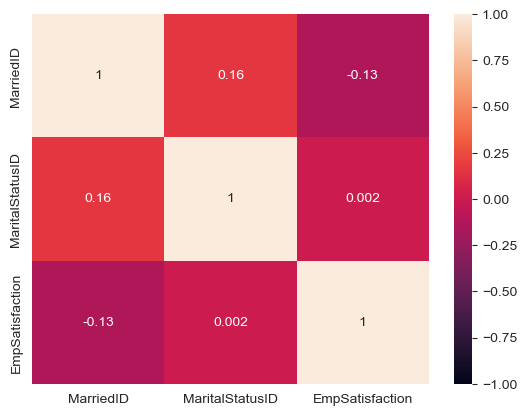

In [1051]:
sns.heatmap(df[['MarriedID','MaritalStatusID', 'EmpSatisfaction']].corr(), vmin=-1, vmax=1, annot=True)

<b><font color='green'>ODP: Status cywilny w żaden sposób nie koreluje z zadowoleniem z pracy.</b></font>

### Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [1052]:
df['DOB'].sort_values()

13    1969-02-09
10    1969-02-24
72    1969-03-31
232   1969-09-08
108   1969-09-29
         ...    
160   2068-06-06
61    2068-07-06
115   2068-07-20
146   2068-08-15
74    2068-10-10
Name: DOB, Length: 310, dtype: datetime64[ns]

<AxesSubplot:xlabel='Age', ylabel='Department'>

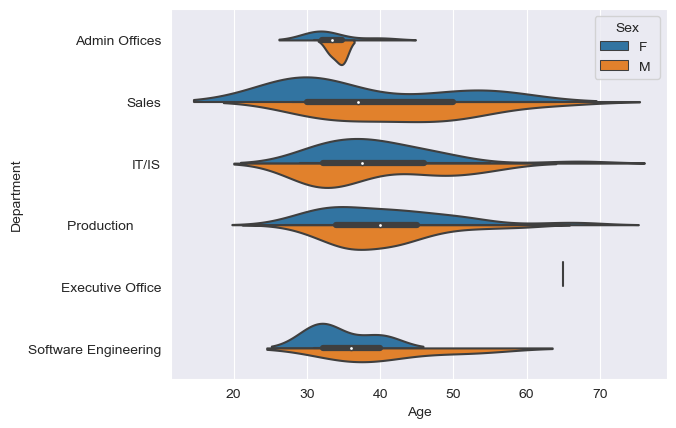

In [1053]:
def calculate_age(born):
    today = dt.date.today()
    born_y = born.year
    if born_y > today.year:
        born_y = born_y - 100        
    return 2019 - born_y - ((9, 27) < (born.month, born.day))

df['Age'] = df['DOB'].apply(calculate_age)
df_employed = df.drop(df[df['Termd'] == 1].index)
sns.violinplot(x='Age',y='Department',data=df,hue='Sex',split=True)

In [1054]:
df_employed['Sex'].loc[1]

'M '

In [1055]:
df_employed[df_employed['Sex'] == 'F']['Age'].quantile([0.25,0.5,0.75])

0.25    32.0
0.50    38.0
0.75    44.0
Name: Age, dtype: float64

In [1056]:
df_employed[df_employed['Sex'] == 'M ']['Age'].quantile([0.25,0.5,0.75])

0.25    34.25
0.50    38.00
0.75    43.75
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Sex'>

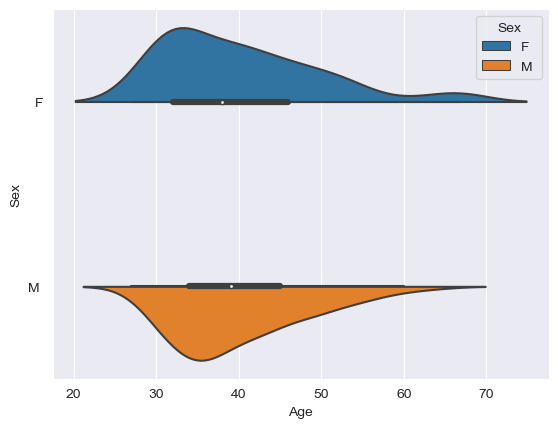

In [1057]:
sns.violinplot(x='Age',y='Sex',data=df,hue='Sex',split=True)

In [1058]:
df_employed['Age'].mean()

39.594202898550726

In [1059]:
df_employed['Age'].median()

38.0

<b><font color='green'>ODP: Struktura wieku pracowników różni się między poszczególnymi działami. Uwagę należy zwrócić, że w dziale produkcyjnym mamy doczynienia z pracownikami starszymi niż w innych działach. Może mieć to związek z niezbędnym doświadczeniem do wykonywania pracy w danym dziale. Najmłodsi pracownicy są w dziale administracji. Średni ogólny wiek pracowników to około 39 lat.</b></font>

### Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [1061]:
df['Age'].median()

38.5

In [1062]:
df['Age'].mean()

40.20322580645161

In [1063]:
df_sp = df[['Age', 'SpecialProjectsCount', 'Department']]

df_sp['Older'] = df_sp['Age'].apply(lambda x: 1 if x > df['Age'].median() else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12068\82853071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['Older'] = df_sp['Age'].apply(lambda x: 1 if x > df['Age'].median() else 0)


In [1064]:
younger_workers = df_sp[df_sp['Older'] == 1]['Older'].count()

In [1065]:
older_workers = df_sp[df_sp['Older'] == 0]['Older'].count()

In [1066]:
df[['SpecialProjectsCount', 'Age', 'Department']].groupby('Department').agg({'Age': 'mean', 'SpecialProjectsCount': 'mean'})

,Age,SpecialProjectsCount
Department,,
Admin Offices,33.700000,3.30
Executive Office,65.000000,0.00
IT/IS,39.400000,5.92
Production,40.701923,0.00
Sales,40.419355,0.00
Software Engineering,37.200000,4.60


In [1067]:
df_r = df_sp[(df_sp['Department'] == 'Admin Offices') | (df_sp['Department'] == 'IT/IS') | (df_sp['Department'] == 'Software Engineering')]

In [1068]:
df_sp[(df_sp['Department'] == 'Admin Offices') | (df_sp['Department'] == 'IT/IS') | (df_sp['Department'] == 'Software Engineering')]

,Age,SpecialProjectsCount,Department,Older
0,31,6.0,Admin Offices,0
1,35,4.0,Admin Offices,0
2,33,5.0,Admin Offices,0
3,34,4.0,Admin Offices,0
4,31,5.0,Admin Offices,0
...,...,...,...,...
305,67,8.0,IT/IS,1
306,33,6.0,IT/IS,0
307,36,5.0,IT/IS,0
308,54,4.0,IT/IS,1


In [1070]:
df_r.head()

,Age,SpecialProjectsCount,Department,Older
0,31,6.0,Admin Offices,0
1,35,4.0,Admin Offices,0
2,33,5.0,Admin Offices,0
3,34,4.0,Admin Offices,0
4,31,5.0,Admin Offices,0


<AxesSubplot:xlabel='Older', ylabel='SpecialProjectsCount'>

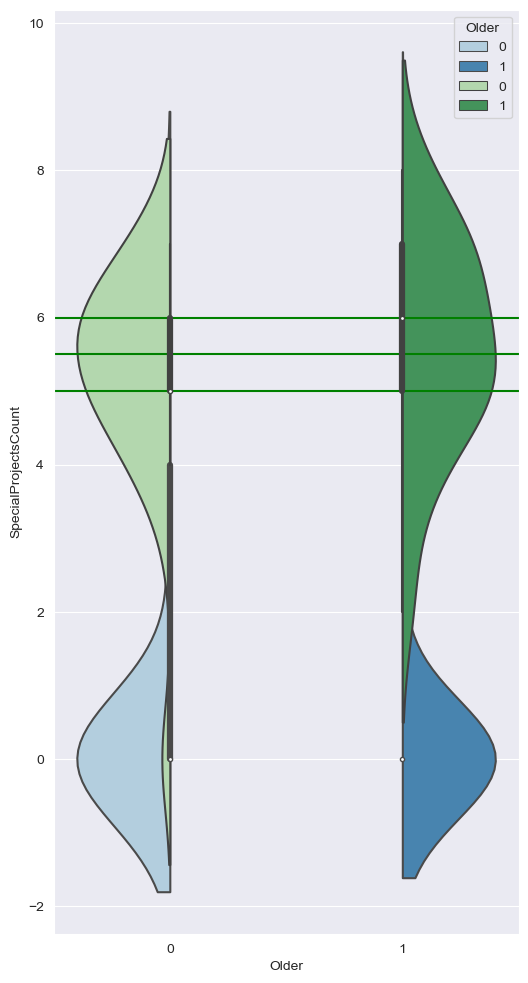

In [1086]:
fig, ax = plt.subplots(figsize=(6, 12))
ax.plot([-2,8], [df_r['SpecialProjectsCount'].quantile([0.25,0.5,0.75]),df_r['SpecialProjectsCount'].quantile([0.25,0.5,0.75])], color='green')
sns.violinplot(x='Older', y='SpecialProjectsCount', data=df_sp, alpha = 0.4,palette="Blues", hue='Older', split=True)
sns.violinplot(x='Older', y='SpecialProjectsCount', data=df_r, alpha = 0.4, palette="Greens", hue='Older', split=True)

In [1072]:
df_sp[df_sp['Older'] == 0]['SpecialProjectsCount'].mean()

1.4451612903225806

In [1073]:
df_sp[df_sp['Older'] == 1]['SpecialProjectsCount'].mean()

0.9741935483870968

In [1074]:
df_r[df_r['Older'] == 0]['SpecialProjectsCount'].mean()

5.209302325581396

In [1075]:
df_r[df_r['Older'] == 1]['SpecialProjectsCount'].mean()

5.592592592592593

<AxesSubplot:>

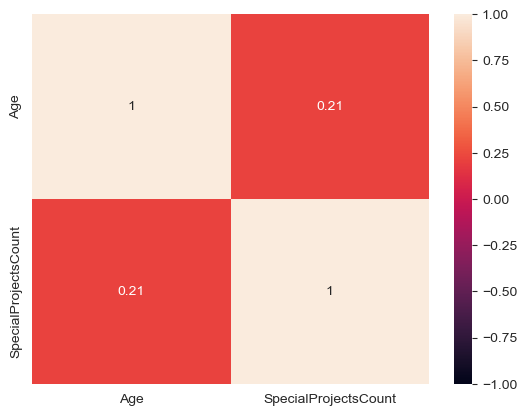

In [1076]:
sns.heatmap(df_r[['Age', 'SpecialProjectsCount']].corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

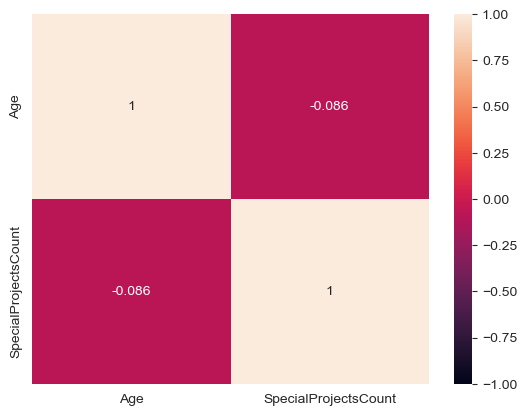

In [1077]:
sns.heatmap(df_sp[['Age', 'SpecialProjectsCount']].corr(), vmin=-1, vmax=1, annot=True)

In [1078]:
dz = df[['SpecialProjectsCount', 'Age', 'Department']].groupby('Department').agg({'Age': 'mean', 'SpecialProjectsCount': 'mean'})
dz[dz['SpecialProjectsCount'] == 0]

,Age,SpecialProjectsCount
Department,,
Executive Office,65.000000,0.0
Production,40.701923,0.0
Sales,40.419355,0.0


<b><font color='green'>ODP: Jeżeli uwzględniamy pracowników z działów: 'Executive Office', 'Production', 'Sales' to możemy stwierdzić, że starsi pracownicy nie otrzymują więcej specjalnych projektów. Jednak analizując dane możemy stwierdzić, że żadna osoba z tych działów nie otrzymała takiego projektu. Grupa produkcyjna jest najliczniejszą grupą i żaden pracownik bez względu na wiek nie otrzymał specjalnego projektu. Możemy stwierdzić, że te grupy nie podlegają pod specjalne projekty. Jeśli wykluczymy je z analizy to możemy stwierdzić, że starsi pracownicy otrzymują więcej projektów specjalnych.</b></font>